# Constructing an icosphere

An icosphere is a simplest mesh model. The surface elements have similiar surface areas.

One caveat of an icosphere model is the fact that the rotation is assumed to be a rigid-body rotation in our software. (Differential rotation should rather be represented using a different kind of mesh or the mesh should be recalculated at each step - to be explored in the future)

The models constructed using this software have physical values tied to them, which are then used in some operations, e.g. log g or orbits calculation.

**Important caveat**: our software requires double float precision to calculate the flux values. Make sure to enable the ```jax_enable_x64``` flag in ```jax``` config.

In [5]:
from models import IcosphereModel
import jax.numpy as jnp
import matplotlib.pyplot as plt
import astropy.units as u

from jax import config

# This is crucial so that flux is calculated with proper precision
config.update("jax_enable_x64", True)

sol_rad = u.solRad.to(u.cm)

# Construct a simple icosphere model with 1000 points.
# The model represents a star with a solar mass and solar radius. The log g and abundance values are placeholders of "reasonable" values
m1 = IcosphereModel.construct(1000, u.solRad.to(u.cm), 1.*u.solMass.to(u.kg), 1., jnp.concatenate([jnp.array([3.75]), jnp.ones(19)]))

Let's plot a constructed model as a mesh.

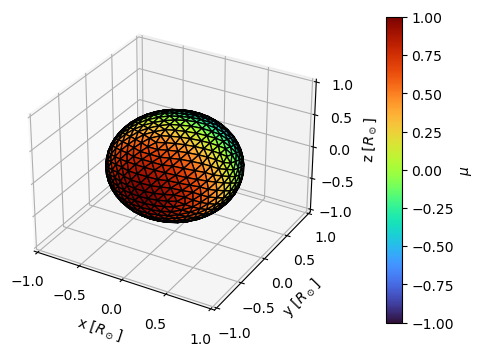

In [6]:
from mpl_toolkits.mplot3d import art3d
import matplotlib as mpl

fig = plt.figure(figsize=(5, 5))

norm = mpl.colors.Normalize(-1, 1)
mu_colors = mpl.colormaps['turbo'](norm(m1.mus))
ax2 = fig.add_subplot(projection="3d")
vs2 = m1.vertices[m1.faces.astype(int)]
pc2 = art3d.Poly3DCollection(vs2, facecolors=mu_colors, edgecolor="black")
ax2.add_collection(pc2)
ax2.set_xlim(-1e11, 1e11)
ax2.set_ylim(-1e11, 1e11)
ax2.set_zlim(-1e11, 1e11)
ax2.set_xlabel('x [$R_\odot$]')
ax2.set_ylabel('y [$R_\odot$]')
ax2.set_zlabel('z [$R_\odot$]')
m = mpl.cm.ScalarMappable(cmap=plt.colormaps['turbo'], norm=norm)
m.set_array([])
cbar = fig.colorbar(m, shrink=0.65, pad=0.125, ax=ax2)
cbar.set_label('$\mu$')
fig.tight_layout();

This procedure is wrapped up in functions in the ```plots``` module and can be used as follows:

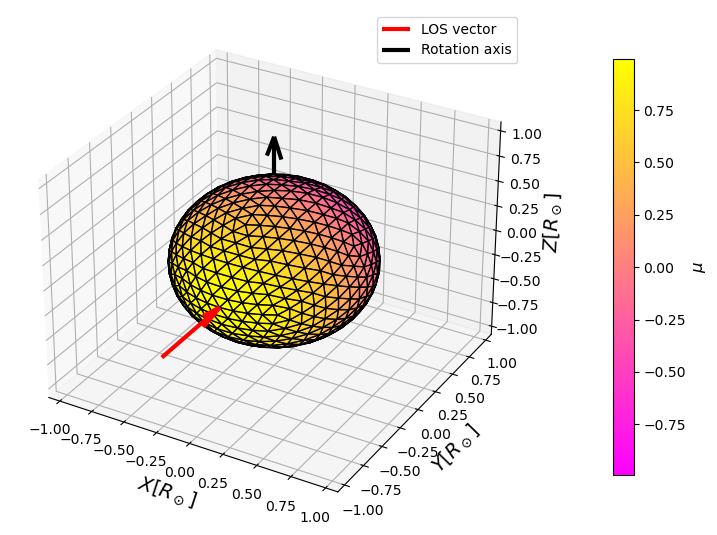

In [7]:
from plots.plot_mesh import plot_3D

plot_3D(m1, property='mus', cmap='spring');

The mesh can be also plotted as an array of mesh triangle centers.

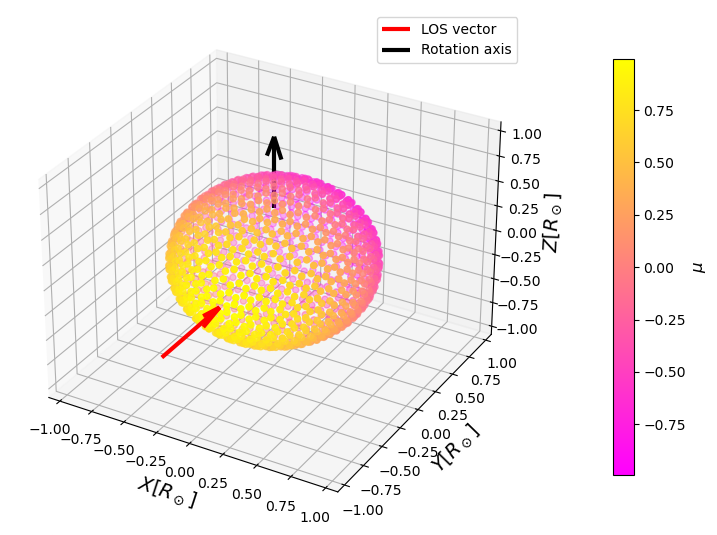

In [8]:
plot_3D(m1, property='mus', cmap='spring', mode='POINTS');